## We will compare the performance of a GP trained using two methods. 
> Min Max Latin HyperCube Sampling

> Active learning sampling (Emukit)

### Generate 50 initial design points using LHS which will be used as common initial data for both methods

In [1]:
from emukit.core.initial_designs.latin_design import LatinDesign
from emukit.core import ParameterSpace, ContinuousParameter

import run_simple_energy_loss_parallel_pool

import pandas as pd
import numpy as np

import os

In [2]:
simulation = run_simple_energy_loss_parallel_pool.run_simulation

In [3]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [5] # p_T Observables we will use for the analysis

In [4]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.1,0.4 ),
                                  ContinuousParameter('exponent_inel', -2, 2),
                                  ContinuousParameter('exponent_el', -2, 2),
                                  ContinuousParameter('scale_inel', 0.1, 0.4),
                                  ContinuousParameter('scale_el', 0.1, 0.4)])

In [5]:
param_keys = ['alpha_s','exponent_inel','exponent_el','scale_inel', 'scale_el']
result_keys = ['pT {} GeV'.format(str(i)) for i in np.linspace(*pT_range)]
clms_names = np.hstack((param_keys,result_keys))
print(clms_names)

['alpha_s' 'exponent_inel' 'exponent_el' 'scale_inel' 'scale_el'
 'pT 1.0 GeV' 'pT 2.0 GeV' 'pT 3.0 GeV' 'pT 4.0 GeV' 'pT 5.0 GeV'
 'pT 6.0 GeV' 'pT 7.0 GeV' 'pT 8.0 GeV' 'pT 9.0 GeV' 'pT 10.0 GeV']


In [6]:
if os.path.exists('lhs.csv'):
    lhs_df = pd.read_csv('lhs.csv')
    
else:
    design = LatinDesign(parameter_space) 
    # Keep the first 50 as initial training point for active learning. 
    # Use all 100 to train a GP
    num_data_points = 100 
    X = design.get_samples(num_data_points)
    Y_all = simulation(X,*pT_range)
    lhs_data=np.hstack((X,Y_all))
    print(lhs_data.shape)
    print('saving the lhs to a csv file')
    lhs_df = pd.DataFrame(lhs_data,columns=clms_names)
    # Write dataframe to file
    lhs_df.to_csv('lhs.csv', index = False)

In [7]:
lhs_df.head()

,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.2695,-1.86,-0.94,0.2845,0.2605,0.722991,0.843341,0.154389,0.071179,0.044701,0.033093,0.027051,0.023217,0.019802,0.016016
1,0.3865,-1.10,-1.54,0.2815,0.3295,0.319529,0.402466,0.026047,0.007113,0.003204,0.001905,0.001329,0.000977,0.000688,0.000442
2,0.2635,0.10,-0.30,0.1945,0.2845,0.739818,0.809835,0.321622,0.219820,0.180239,0.160985,0.150460,0.143824,0.137645,0.129461
3,0.1405,0.58,1.14,0.1885,0.1075,0.887394,0.912874,0.703802,0.633600,0.600516,0.582871,0.572930,0.566833,0.560965,0.551986
4,0.2185,1.90,-0.46,0.3685,0.2875,0.793692,0.828440,0.553116,0.469929,0.432635,0.413412,0.402882,0.396516,0.390257,0.380507


In [8]:
start_n = 50
X_all = np.array(lhs_df.iloc[:,:5])
Y_all = np.array(lhs_df.iloc[:,5:])
X_init = X_all[:50,:]
Y_init = Y_all[:50,:]

print(f'Shape of initial design {X_init.shape} and initial observables {Y_init.shape}')

Shape of initial design (50, 5) and initial observables (50, 10)


In [9]:
# Load validation data
validation_df = pd.read_csv('validation.csv', index_col=0)
X_valid = np.array(validation_df.iloc[:,:5])
Y_valid = np.array(validation_df.iloc[:,5:])
print(f'Shape of validation design {X_valid.shape} and validation observables {Y_valid.shape}')
validation_df.head()

Shape of validation design (100, 5) and validation observables (100, 10)


,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.139880,1.233532,0.023331,0.277208,0.310282,0.923065,0.944544,0.765945,0.703582,0.673583,0.657323,0.648015,0.642235,0.636743,0.628520
1,0.332736,-0.131905,0.751403,0.212024,0.279861,0.688620,0.791497,0.175990,0.092273,0.064660,0.052266,0.045716,0.041578,0.037848,0.033352
2,0.370226,1.457209,-0.285213,0.201070,0.190545,0.568233,0.665193,0.114913,0.051152,0.031581,0.023231,0.018968,0.016290,0.013855,0.011014
3,0.259227,-0.766722,-1.405136,0.164316,0.136741,0.803727,0.875761,0.366005,0.254727,0.210319,0.188285,0.176045,0.168278,0.161129,0.151751
4,0.276825,-0.279757,-0.899501,0.178222,0.316869,0.651347,0.718871,0.258172,0.168719,0.135002,0.118950,0.110332,0.104940,0.099839,0.092970


## Need to write a function that runs iteratively adding more design points and train both type of gps. 
> plots should have how rms error decreases for the two types with time

> How predictions at the truth compare at each steps of sampling


In [10]:
prior_ranges= {'alpha_s':(0.1,0.4), 'exponent_inel':(-2,2), 'exponent_el':(-2,2), 'scale_inel':(0.1, 0.4), 'scale_el':(0.1, 0.4)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

In [11]:
# define the two types of gp we will use
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

In [12]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

#gp_array = []

rbf_kern_1 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_1 = rbf_kern_1
model_gpy_1 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_1, noise_var=0.01**2)
model_gpy_1.optimize_restarts(num_restarts = 30)
model_emukit_1 = GPyModelWrapper(model_gpy_1, n_restarts=30)
    
rbf_kern_2 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_2 = rbf_kern_2
model_gpy_2 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_2, noise_var=0.01**2)
model_gpy_2.optimize_restarts(num_restarts = 30)
model_emukit_2 = GPyModelWrapper(model_gpy_2, n_restarts=30)
    
gp_array = [model_emukit_1, model_emukit_2]

Optimization restart 1/30, f = -94.34704208475245
Optimization restart 2/30, f = -94.34704208472567
Optimization restart 3/30, f = -94.34704208245685
Optimization restart 4/30, f = -93.93934929999975
Optimization restart 5/30, f = -94.34704160766168
Optimization restart 6/30, f = -93.93934949530723
Optimization restart 7/30, f = -94.34704180667038
Optimization restart 8/30, f = -94.34704206284053
Optimization restart 9/30, f = -94.3470420591076
Optimization restart 10/30, f = -94.34704204833383
Optimization restart 11/30, f = -94.34704207736885
Optimization restart 12/30, f = -93.93937153932339
Optimization restart 13/30, f = -92.51284802115771
Optimization restart 14/30, f = -92.518889993211
Optimization restart 15/30, f = -94.3470420824269
Optimization restart 16/30, f = -92.51600368244475
Optimization restart 17/30, f = -94.34704208416554
Optimization restart 18/30, f = -94.3470420836153
Optimization restart 19/30, f = -94.34704202902613
Optimization restart 20/30, f = -94.347042080

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 27/30, f = -93.93943223573656
Optimization restart 28/30, f = -94.3470420827233
Optimization restart 29/30, f = -93.93985275343262
Optimization restart 30/30, f = -94.34704201029196


In [13]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design import ExperimentalDesignLoop

In [14]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(f'design is {design}')
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

In [15]:
def emu_predict(X, gp):
    y, variance_dy = gp.predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def compare_gp(gp_1,gp_2):
    #make a regular grid to plot our Emulator predictions
    n_plot_pts = 100
    sim_pnt = 10
    for name in prior_ranges.keys():
        test_points = np.repeat(truth, 100, axis = 0)
        pos = name_to_position[name]
        test_points[:,pos] = np.linspace(*prior_ranges[name],100)
        simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
        plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),pos], simulation_out[:,0],'ro', label=f'sim {pT_obs[0]} GeV')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,1],'go', label='sim pT_obs[1]')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
        gp_y0, gp_dy0 = emu_predict(test_points, gp_1)
        gp_y1, gp_dy1 = emu_predict(test_points, gp_2)
#gp_y2, gp_dy2 = emu_predict2(test_points)


        plt.plot(test_points[:,pos], gp_y0[:,0], color='red', label='Emukit')
        plt.plot(test_points[:,pos], gp_y1[:,0], color='blue', label='lhs')
#plt.plot(test_points[:,0], gp_y2[:,0], color='blue', label='pT_obs[2]')
        plt.fill_between(test_points[:,pos], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
        plt.fill_between(test_points[:,pos], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')
#plt.fill_between(test_points[:,0], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
#                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

        plt.xlabel(name)
        plt.ylabel(r'$R_{AA}$')
        plt.title(f'LHS {gp_1.X.shape[0]}, Emukit {gp_2.X.shape[0]}')
        plt.legend()
        plt.tight_layout(True)

        plt.show()
        
    gp1_validation,_ = emu_predict(X_valid,gp_1)
    gp2_validation,_ = emu_predict(X_valid,gp_2)
    validation_score = [mse(Y_valid[:,pT_obs[0]],gp1_validation, squared=False),
                        mse(Y_valid[:,pT_obs[0]],gp2_validation, squared=False)]
    return validation_score

Working on design 2Working on design 1Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 64.57374405860901 S
Total run time for the simulations 1.49 minutes


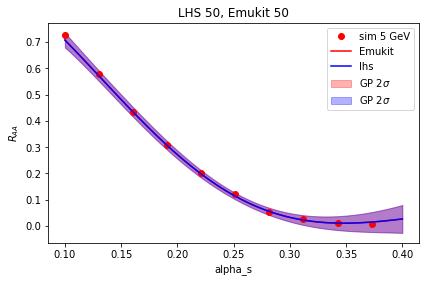

Working on design 4Working on design 3
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


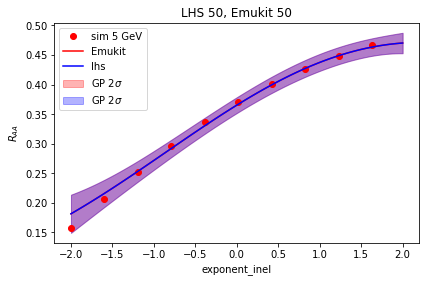

Working on design 4Working on design 3
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 9Working on design 8

Working on design 10
Total run time for the simulations 0.84 minutes


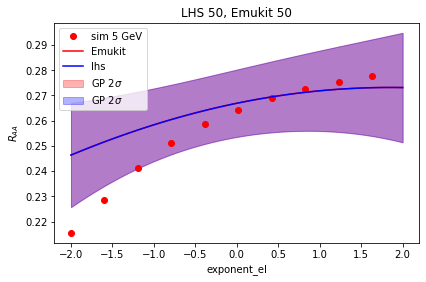

Working on design 4Working on design 3

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


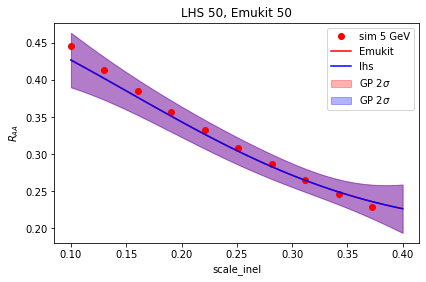

Working on design 3Working on design 4Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.90 minutes


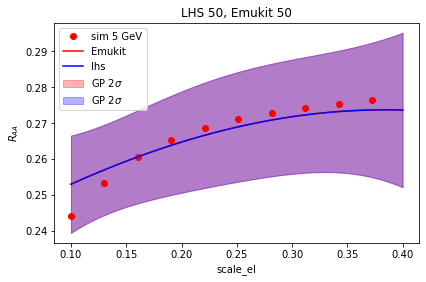

######################
AL before hyperparameters are


Name : GP regression
Objective : -94.34704208478979
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1611495599167326  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  1.3402541690187346e-05  |      +ve      |        
Optimization restart 1/30, f = -94.34704208479042
Optimization restart 2/30, f = -94.34704208085756
Optimization restart 3/30, f = -92.52020234783899
Optimization restart 4/30, f = -94.3470420216818
Optimization restart 5/30, f = -94.34704208338832
Optimization restart 6/30, f = -94.34704208418346
Optimization restart 7/30, f = -94.34704201681538
Optimization restart 8/30, f = -94.34704197313415
Optimization restart 9/30, f = -94.34704207934897
Optimization restart 10/30, f = -9

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 3


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.38991434 -1.46101338  1.55151839  0.26458996  0.20003799] takes 74.87709832191467 S
Total run time for the simulations 1.25 minutes
Optimization restart 1/30, f = -100.5857022495179
Optimization restart 2/30, f = -104.85576099616426
Optimization restart 3/30, f = -100.58570220636418
Optimization restart 4/30, f = -97.02785165568787
Optimization restart 5/30, f = -97.0280269047491
Optimization restart 6/30, f = -39.382765885068125
Optimization restart 7/30, f = -100.58570216798606


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 8/30, f = -100.58570225863231
Optimization restart 9/30, f = -97.02785093187677
Optimization restart 10/30, f = -100.58570225800088
Optimization restart 11/30, f = -100.58570212988921
Optimization restart 12/30, f = -100.58570224741159
Optimization restart 13/30, f = -104.8518461113641
Optimization restart 14/30, f = -100.58570218875933
Optimization restart 15/30, f = -100.58570223407565
Optimization restart 16/30, f = -100.58570221489371
Optimization restart 17/30, f = -100.58570226188546
Optimization restart 18/30, f = -100.58570225837065
Optimization restart 19/30, f = -100.58570223896112
Optimization restart 20/30, f = -100.58570226123288
Optimization restart 21/30, f = -100.58570217843712
Optimization restart 22/30, f = -100.58570222356619
Optimization restart 23/30, f = -100.5857022226265
Optimization restart 24/30, f = -100.58570225310268
Optimization restart 25/30, f = -100.58570223819736
Optimization restart 26/30, f = -100.58570223634675
Optimization rest

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8Working on design 9

Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.8392288684845 S
Total run time for the simulations 1.52 minutes


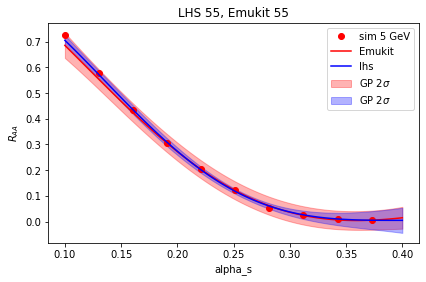

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


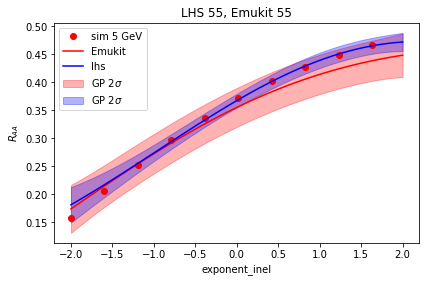

Working on design 4
Working on design 5Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


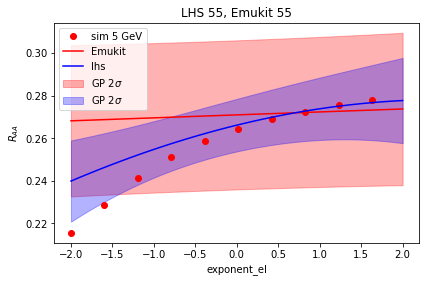

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


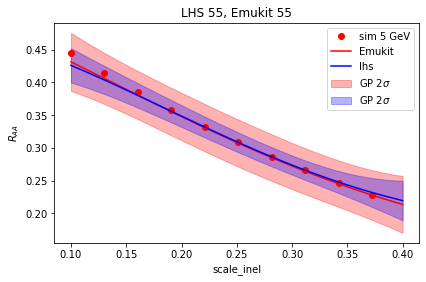

Working on design 3Working on design 5Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.90 minutes


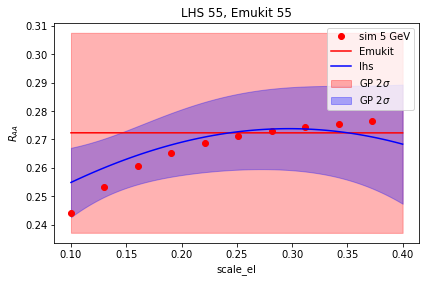

#################### 
 ######################
Validation score for 0 iteration AL 0.023060398823430726 , LHS 0.014932625747186774
######################
AL before hyperparameters are


Name : GP regression
Objective : -104.85576099616426
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.2450188343473577  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002567088768200904  |      +ve      |        
Optimization restart 1/30, f = -104.85576106498334
Optimization restart 2/30, f = -100.58570220270644
Optimization restart 3/30, f = -100.5857022308365
Optimization restart 4/30, f = -100.58570225550257
Optimization restart 5/30, f = -100.58570225459727
Optimization restart 6/30, f = -100.58570217156348
Optimization restart 7/30, f = -100.58570224597038


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.38363229 -1.76615541 -0.66445911  0.35689891  0.12124379] takes 131.14070463180542 S
Total run time for the simulations 2.19 minutes
Optimization restart 1/30, f = -114.8276213531806
Optimization restart 2/30, f = -109.40958489871574
Optimization restart 3/30, f = -109.40958477411506
Optimization restart 4/30, f = -109.40958485333039
Optimization restart 5/30, f = -109.40958489903068
Optimization restart 6/30, f = -70.50385240334529
Optimization restart 7/30, f = -109.40958489565124
Optimization restart 8/30, f = -109.40958489810845
Optimization restart 9/30, f = -109.40958486195694
Optimization restart 10/30, f = -109.4095848956315
Optimization restart 11/30, f = -109.40958486921073
Optimization restart 12/30, f = -109.40958484655482
Optimization restart 13/30, f = -109.40958487683487
Optimization restart 14/30, f = -106.38238728821516
Optimization restart 15/30, f = -114.83510464997956
Optimization restart 16/30, f = -109.40958488042199
Optimization restart 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 64.9814612865448 S
Total run time for the simulations 1.50 minutes


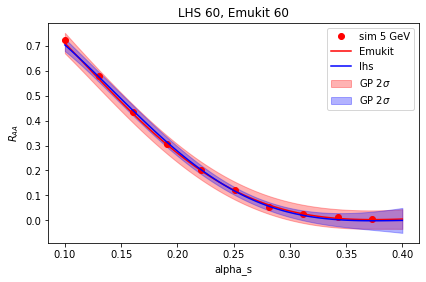

Working on design 3Working on design 1Working on design 2


Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


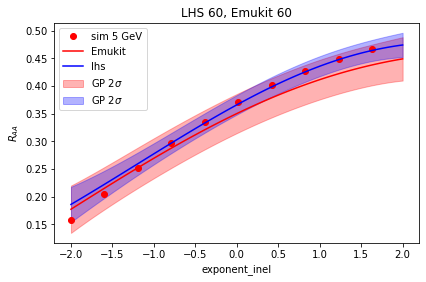

Working on design 4
Working on design 3
Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


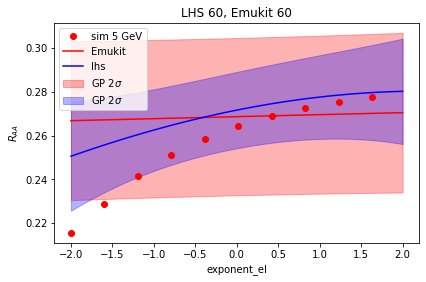

Working on design 4Working on design 5
Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


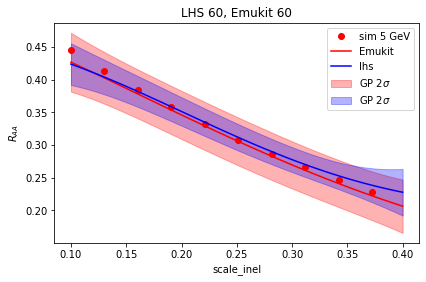

Working on design 5Working on design 3Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.91 minutes


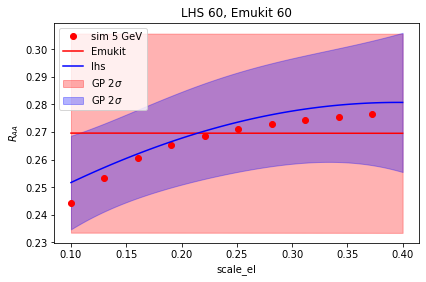

#################### 
 ######################
Validation score for 1 iteration AL 0.02115327094338211 , LHS 0.013247679371191671
######################
AL before hyperparameters are


Name : GP regression
Objective : -114.83510464997956
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.24476853195772522  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002719991475134963  |      +ve      |        
Optimization restart 1/30, f = -114.83510465905803
Optimization restart 2/30, f = -109.40958487407605
Optimization restart 3/30, f = -109.40958489999075
Optimization restart 4/30, f = -114.83338989903491
Optimization restart 5/30, f = -109.40958489333585
Optimization restart 6/30, f = -109.40958487273129
Optimization restart 7/30, f = -109.40958489938241


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

For model parameters [ 0.32093576  1.95047965 -0.12789674  0.10139932  0.10090654] takes 66.40990662574768 S
For model parameters [ 0.26155443 -1.95748221 -1.77047725  0.39560591  0.17932709] takes 84.10024070739746 S
Total run time for the simulations 1.40 minutes
Optimization restart 1/30, f = -126.22909804267181
Optimization restart 2/30, f = -122.45008666523728
Optimization restart 3/30, f = -42.92596093166234


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 4/30, f = -126.26317359766449
Optimization restart 5/30, f = -122.4500872356781
Optimization restart 6/30, f = -122.45008727605037
Optimization restart 7/30, f = -122.45008717779379
Optimization restart 8/30, f = -122.4500872756633
Optimization restart 9/30, f = -122.4500872772884
Optimization restart 10/30, f = -122.45008724562445
Optimization restart 11/30, f = -116.22280480815064
Optimization restart 12/30, f = -122.45008727770704
Optimization restart 13/30, f = -122.45008727483284
Optimization restart 14/30, f = -122.45008727663264
Optimization restart 15/30, f = -122.45008727919287
Optimization restart 16/30, f = -126.2631713862309
Optimization restart 17/30, f = -122.45008726777863
Optimization restart 18/30, f = -122.4500872178972
Optimization restart 19/30, f = -116.22280487714886
Optimization restart 20/30, f = -122.45008728024402
Optimization restart 21/30, f = -122.45008720007635
Optimization restart 22/30, f = -122.45008728101337
Optimization restart 23

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.367196559906 S
Total run time for the simulations 1.51 minutes


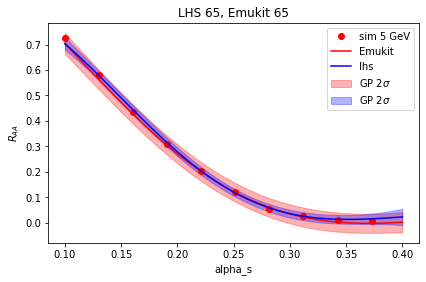

Working on design 5Working on design 3Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


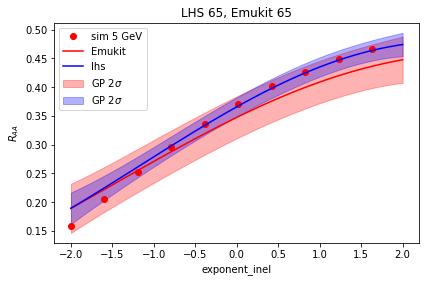

Working on design 4
Working on design 3
Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


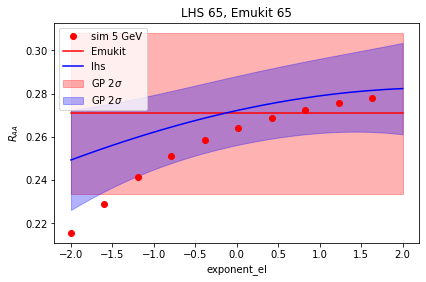

Working on design 3Working on design 5Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


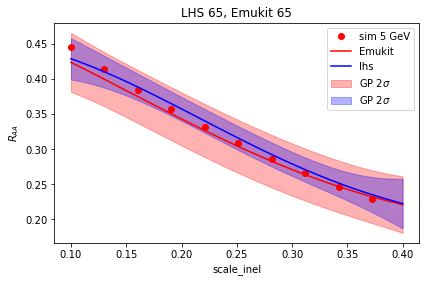

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6Working on design 7

Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.90 minutes


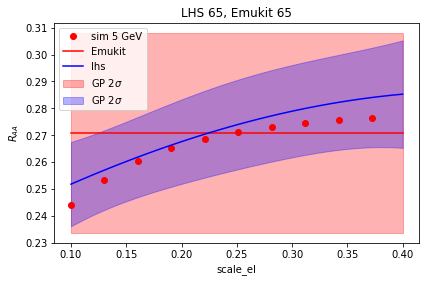

#################### 
 ######################
Validation score for 2 iteration AL 0.022260950304346147 , LHS 0.012211520712029215
######################
AL before hyperparameters are


Name : GP regression
Objective : -126.26317359766449
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.2379333482729636  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002951664665896764  |      +ve      |        
Optimization restart 1/30, f = -126.26317393933891


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/30, f = -126.26317340655658
Optimization restart 3/30, f = -122.45008727363683
Optimization restart 4/30, f = -122.45008727155911
Optimization restart 5/30, f = -122.45008725149827
Optimization restart 6/30, f = -122.45008727658988
Optimization restart 7/30, f = -116.1853809041551
Optimization restart 8/30, f = -122.45008726972301
Optimization restart 9/30, f = -122.45008720155877
Optimization restart 10/30, f = -122.45008721211819
Optimization restart 11/30, f = -122.45008720151367
Optimization restart 12/30, f = -122.45008725325003
Optimization restart 13/30, f = -122.45008726804735
Optimization restart 14/30, f = -122.45008728010737
Optimization restart 15/30, f = -122.45008727358149
Optimization restart 16/30, f = -122.45008725781075
Optimization restart 17/30, f = -122.45008726276419
Optimization restart 18/30, f = -126.26317423934762
Optimization restart 19/30, f = -122.4500870446237
Optimization restart 20/30, f = -122.45008727839414
Optimization restart 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Total run time for the simulations 0.49 minutes
Optimization restart 1/30, f = -136.58338838591857
Optimization restart 2/30, f = -131.32317597467758
Optimization restart 3/30, f = -131.32317612044073
Optimization restart 4/30, f = -131.32317609147808
Optimization restart 5/30, f = -131.32317608212247
Optimization restart 6/30, f = -131.32317612578177
Optimization restart 7/30, f = -131.32317598506233
Optimization restart 8/30, f = -131.32317614423175
Optimization restart 9/30, f = -131.32317614289815
Optimization restart 10/30, f = -131.32317606604377
Optimization restart 11/30, f = -131.32317612211926
Optimization restart 12/30, f = -131.32317582745503
Optimization restart 13/30, f = -131.32317614244528
Optimization restart 14/30, f = -131.3231761331789
Optimization restart 15/30, f = -131.32317614127246
Optimization restart 16/30, f = -131.32317612594574
Optimization restart 17/30, f = -131.32317613697847
Optimization restart 18/30, f = -131.32317614464625
Optimization restart 19/30

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.506094455719 S
Total run time for the simulations 1.51 minutes


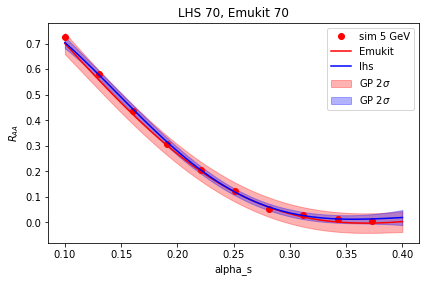

Working on design 4Working on design 3
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


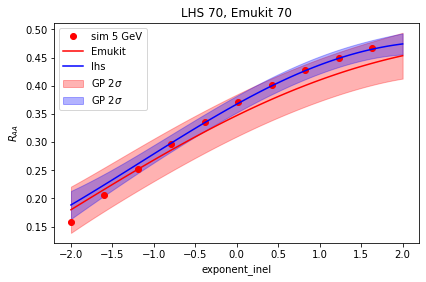

Working on design 5Working on design 4Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


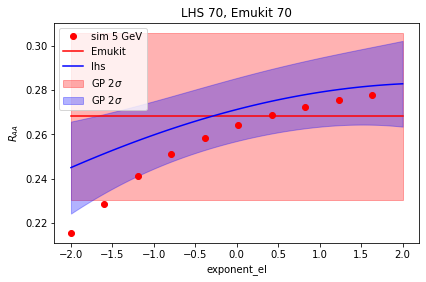

Working on design 3Working on design 5Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


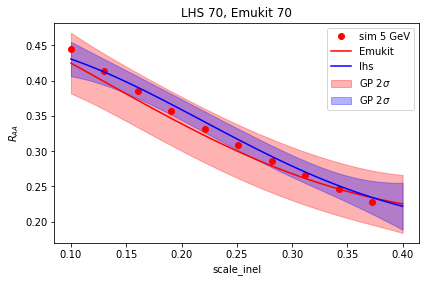

Working on design 4Working on design 3Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.92 minutes


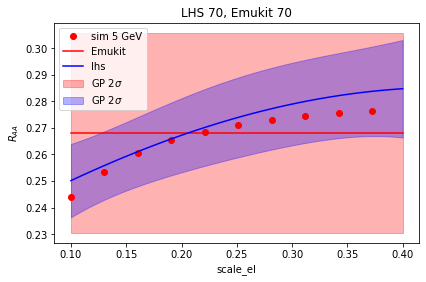

#################### 
 ######################
Validation score for 3 iteration AL 0.021803385201655767 , LHS 0.011530018336085015
######################
AL before hyperparameters are


Name : GP regression
Objective : -136.58338838591857
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.26999668626160644  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00030870785600733584  |      +ve      |        
Optimization restart 1/30, f = -136.58338844638058
Optimization restart 2/30, f = -131.32317614398175
Optimization restart 3/30, f = -131.32317610481346


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/30, f = -131.32317614232346
Optimization restart 5/30, f = -131.32317614450574
Optimization restart 6/30, f = -131.32317614278986
Optimization restart 7/30, f = -136.58338236583938
Optimization restart 8/30, f = -131.32317602912292
Optimization restart 9/30, f = -131.32317613305742
Optimization restart 10/30, f = -131.32317602004844
Optimization restart 11/30, f = -131.32317609706547
Optimization restart 12/30, f = -131.3231761444319
Optimization restart 13/30, f = -127.61319943146964
Optimization restart 14/30, f = -131.32317614271534
Optimization restart 15/30, f = -131.32317609645804
Optimization restart 16/30, f = -131.32317614341486
Optimization restart 17/30, f = -131.32317607319249
Optimization restart 18/30, f = -131.32317565261573
Optimization restart 19/30, f = -131.32317609654092
Optimization restart 20/30, f = -131.3231760854774
Optimization restart 21/30, f = -131.3231761336105
Optimization restart 22/30, f = -131.32317614342142
Optimization restart 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5Working on design 2
Working on design 1




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Total run time for the simulations 0.68 minutes
Optimization restart 1/30, f = -148.587542129874
Optimization restart 2/30, f = -144.95621052197907
Optimization restart 3/30, f = -144.95621047478937
Optimization restart 4/30, f = -144.9562104950164
Optimization restart 5/30, f = -144.95621030752136
Optimization restart 6/30, f = -144.95621052760413
Optimization restart 7/30, f = -144.9562105038758
Optimization restart 8/30, f = -144.95621053706896
Optimization restart 9/30, f = -144.95620965408023
Optimization restart 10/30, f = -144.95621053385918
Optimization restart 11/30, f = -144.9562104754465
Optimization restart 12/30, f = -144.95621049591978
Optimization restart 13/30, f = -144.95621050766337
Optimization restart 14/30, f = -144.9562104724789
Optimization restart 15/30, f = -144.9562105260807
Optimization restart 16/30, f = -144.9562105351841
Optimization restart 17/30, f = -144.95621053764
Optimization restart 18/30, f = -144.9562103891637
Optimization restart 19/30, f = -144.

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 64.61645150184631 S
Total run time for the simulations 1.49 minutes


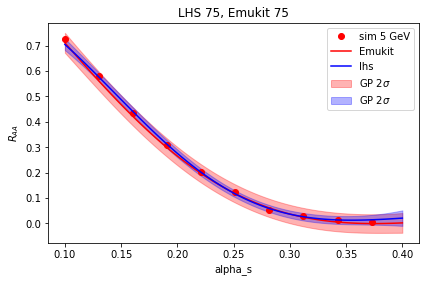

Working on design 3Working on design 4
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


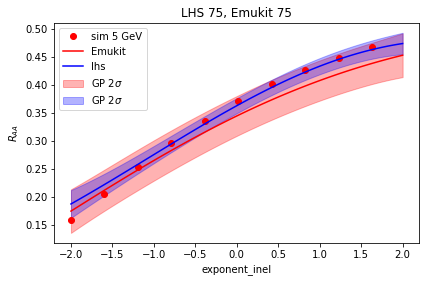

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


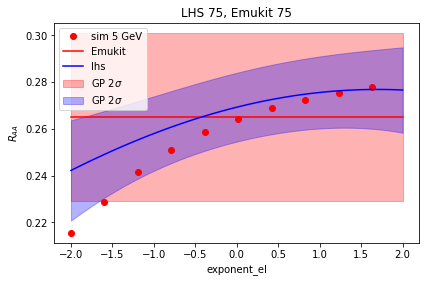

Working on design 3Working on design 5Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


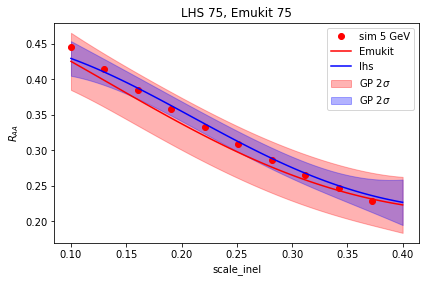

Working on design 5Working on design 3Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.91 minutes


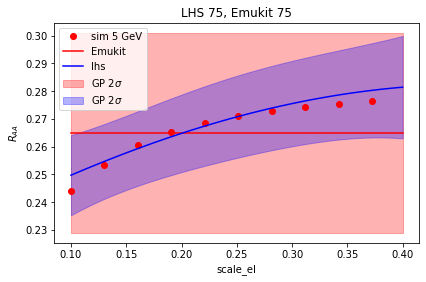

#################### 
 ######################
Validation score for 4 iteration AL 0.021057855194992873 , LHS 0.011241583475815047
######################
AL before hyperparameters are


Name : GP regression
Objective : -148.587542129874
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.27230541838264294  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00028119439411368447  |      +ve      |        
Optimization restart 1/30, f = -148.58754213070475
Optimization restart 2/30, f = -144.95621053758003
Optimization restart 3/30, f = -144.956210521359


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/30, f = -144.9562105044772
Optimization restart 5/30, f = -144.9562104151169
Optimization restart 6/30, f = -144.95621048018916
Optimization restart 7/30, f = -144.956210533922
Optimization restart 8/30, f = -144.95621047805258
Optimization restart 9/30, f = -144.95621053407515
Optimization restart 10/30, f = -144.9562104947472
Optimization restart 11/30, f = -144.9562104143277
Optimization restart 12/30, f = -144.95621052814144
Optimization restart 13/30, f = -144.9562104973889
Optimization restart 14/30, f = -144.9562105039089
Optimization restart 15/30, f = -144.95621051410546
Optimization restart 16/30, f = -144.9562105304834
Optimization restart 17/30, f = -144.9562104642369
Optimization restart 18/30, f = -144.95621049263698
Optimization restart 19/30, f = -144.95621052621487
Optimization restart 20/30, f = -143.39852287452908
Optimization restart 21/30, f = -144.9562105375722
Optimization restart 22/30, f = -144.95621048102458
Optimization restart 23/30, f

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.392866   -1.70013086 -0.41906449  0.38790158  0.37244004] takes 146.24889397621155 S
Total run time for the simulations 2.44 minutes
Optimization restart 1/30, f = -158.81621217347106
Optimization restart 2/30, f = -157.83769892678114
Optimization restart 3/30, f = -157.8376990037308
Optimization restart 4/30, f = -157.83769899582956
Optimization restart 5/30, f = -157.83769899155692
Optimization restart 6/30, f = -157.83769900766555
Optimization restart 7/30, f = -151.41799782541247
Optimization restart 8/30, f = -157.83769899740628
Optimization restart 9/30, f = -157.83769883618172
Optimization restart 10/30, f = -157.83769886423084
Optimization restart 11/30, f = -157.83769899333984
Optimization restart 12/30, f = -157.8376989879219
Optimization restart 13/30, f = -157.83769898941
Optimization restart 14/30, f = -157.83769899714926
Optimization restart 15/30, f = -157.83769896849878
Optimization restart 16/30, f = -157.83769893513227
Optimization restart 17/

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.52708292007446 S
Total run time for the simulations 1.51 minutes


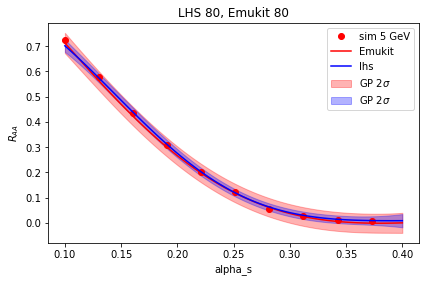

Working on design 3Working on design 4Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.85 minutes


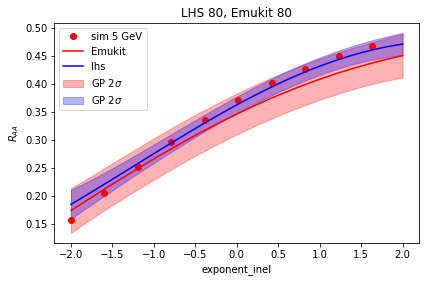

Working on design 4Working on design 3
Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


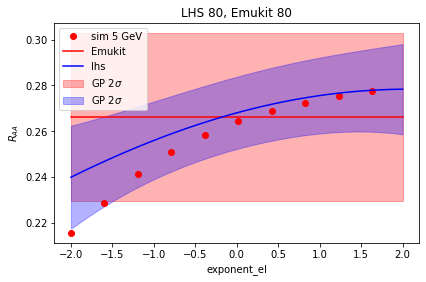

Working on design 3Working on design 4

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


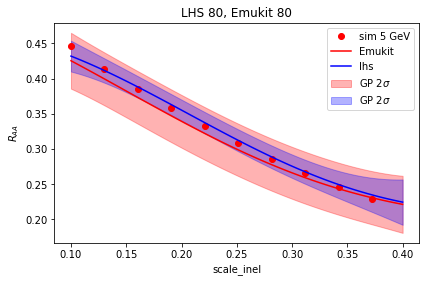

Working on design 5Working on design 3Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8Working on design 9

Working on design 10
Total run time for the simulations 0.91 minutes


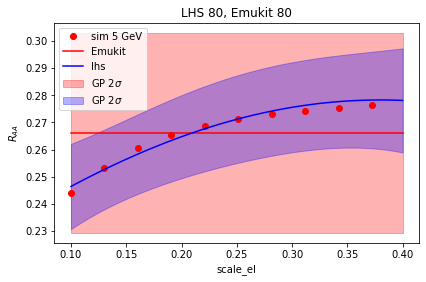

#################### 
 ######################
Validation score for 5 iteration AL 0.021330339197522967 , LHS 0.011925167901296413
######################
AL before hyperparameters are


Name : GP regression
Objective : -158.81621217347106
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.22333373598010514  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00029366379257101565  |      +ve      |        
Optimization restart 1/30, f = -158.81621217405376
Optimization restart 2/30, f = -157.8376990061904
Optimization restart 3/30, f = -157.8376989149575


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/30, f = -157.8376986988065
Optimization restart 5/30, f = -157.8376989289443
Optimization restart 6/30, f = -157.83769900756542
Optimization restart 7/30, f = -157.83769900702123
Optimization restart 8/30, f = -157.83769868096323
Optimization restart 9/30, f = -157.83769881261722
Optimization restart 10/30, f = -157.83769900268481
Optimization restart 11/30, f = -157.83769900805606
Optimization restart 12/30, f = -157.8376989976871
Optimization restart 13/30, f = -157.83769900818976
Optimization restart 14/30, f = -157.83769900140527
Optimization restart 15/30, f = -157.83769899570126
Optimization restart 16/30, f = -157.83769900368577
Optimization restart 17/30, f = -157.83769899768876
Optimization restart 18/30, f = -157.83769900777315
Optimization restart 19/30, f = -157.8376990056549
Optimization restart 20/30, f = -157.83769900520096
Optimization restart 21/30, f = -157.8376990059087
Optimization restart 22/30, f = -157.83769898068917
Optimization restart 23

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Total run time for the simulations 0.49 minutes
Optimization restart 1/30, f = -163.4426815500974
Optimization restart 2/30, f = -171.1383752420112
Optimization restart 3/30, f = -171.13837527059573
Optimization restart 4/30, f = -171.13837518495998
Optimization restart 5/30, f = -171.13837527370194
Optimization restart 6/30, f = -171.1383752734013
Optimization restart 7/30, f = -171.1383752691393
Optimization restart 8/30, f = -171.13837334848654
Optimization restart 9/30, f = -171.13837527804182
Optimization restart 10/30, f = -171.1383752435888
Optimization restart 11/30, f = -171.13837527321053
Optimization restart 12/30, f = -168.03174490187843
Optimization restart 13/30, f = -171.13837526172279
Optimization restart 14/30, f = -171.13837523758386
Optimization restart 15/30, f = -171.13837525795722
Optimization restart 16/30, f = -171.13837504093746
Optimization restart 17/30, f = -171.13837526940551
Optimization restart 18/30, f = -171.13837527478762
Optimization restart 19/30, f 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.5138885974884 S
Total run time for the simulations 1.51 minutes


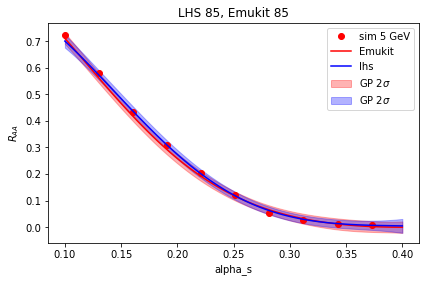

Working on design 3Working on design 4

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


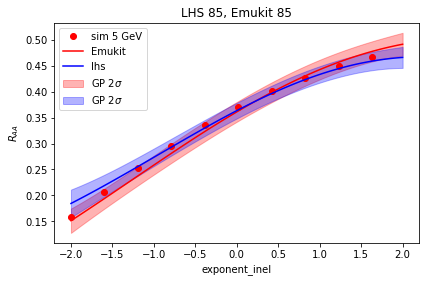

Working on design 4Working on design 3

Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


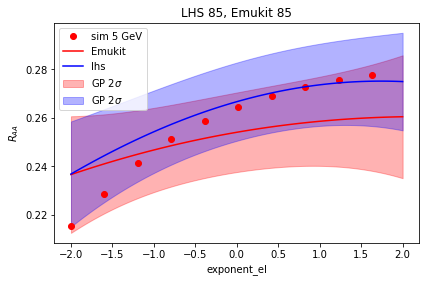

Working on design 4Working on design 3

Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


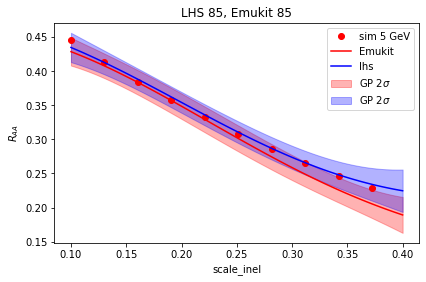

Working on design 4Working on design 3Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.90 minutes


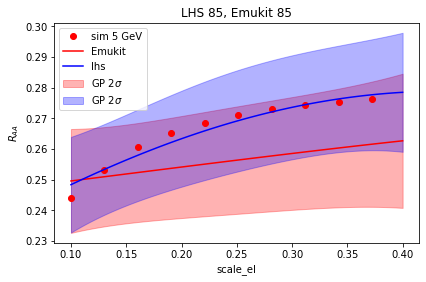

#################### 
 ######################
Validation score for 6 iteration AL 0.014931524046813575 , LHS 0.012433464873415085
######################
AL before hyperparameters are


Name : GP regression
Objective : -171.13837527804182
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.12157204080918528  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  4.165480107827929e-05  |      +ve      |        
Optimization restart 1/30, f = -171.13837527805202
Optimization restart 2/30, f = -171.1383752507063
Optimization restart 3/30, f = -171.1383752759498
Optimization restart 4/30, f = -171.13837527253065
Optimization restart 5/30, f = -171.13837526990523
Optimization restart 6/30, f = -171.13837523129834
Optimization restart 7/30, f = -171.13837527351893
O

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.3205961  -1.7872842   1.6132384   0.32242305  0.13504721] takes 68.15721011161804 S
Total run time for the simulations 1.14 minutes
Optimization restart 1/30, f = -181.85546407292722
Optimization restart 2/30, f = -181.85546368287802
Optimization restart 3/30, f = -181.85546428751434
Optimization restart 4/30, f = -181.85546400665305
Optimization restart 5/30, f = -181.85546425439875
Optimization restart 6/30, f = -181.85546428772756
Optimization restart 7/30, f = -181.85546425203023
Optimization restart 8/30, f = -181.85546429179635
Optimization restart 9/30, f = -181.855464300252
Optimization restart 10/30, f = -181.85546430662058
Optimization restart 11/30, f = -181.85546431065794
Optimization restart 12/30, f = -181.85546429144114
Optimization restart 13/30, f = -181.8554642734094
Optimization restart 14/30, f = -181.85546429706963
Optimization restart 15/30, f = -181.85546429458265
Optimization restart 16/30, f = -175.6474924996685
Optimization restart 17/

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 66.17905783653259 S
Total run time for the simulations 1.53 minutes


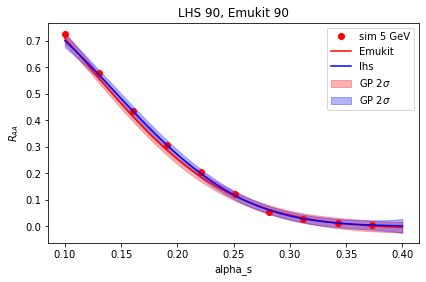

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


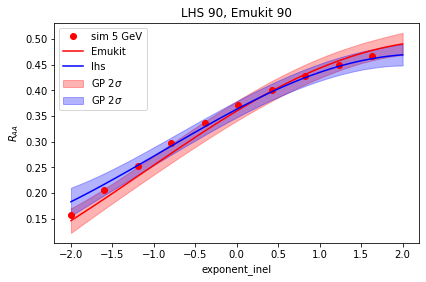

Working on design 5Working on design 3Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


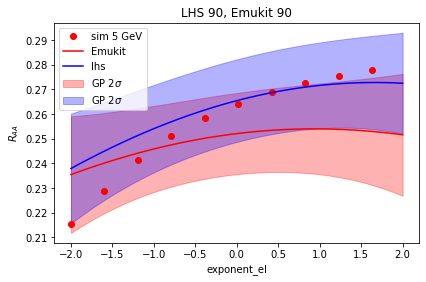

Working on design 4Working on design 3Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


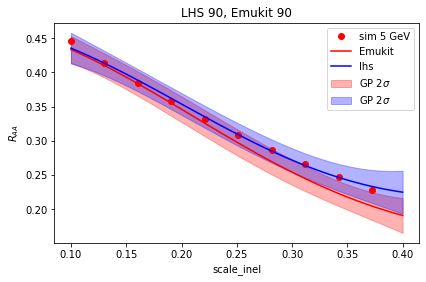

Working on design 3Working on design 5

Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.91 minutes


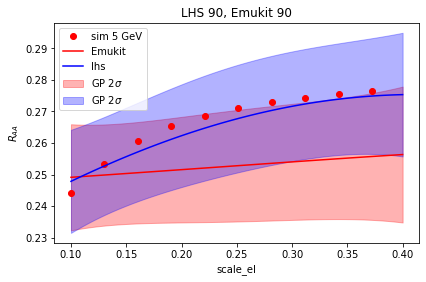

#################### 
 ######################
Validation score for 7 iteration AL 0.011531871650786896 , LHS 0.01088188278817377
######################
AL before hyperparameters are


Name : GP regression
Objective : -181.85546431065794
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.10791250967960633  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  4.0616221248238486e-05  |      +ve      |        
Optimization restart 1/30, f = -181.85546431067195
Optimization restart 2/30, f = -181.85546403019123
Optimization restart 3/30, f = -181.8554642576089
Optimization restart 4/30, f = -181.8554642655562
Optimization restart 5/30, f = -181.85546430100638
Optimization restart 6/30, f = -181.8554634663061
Optimization restart 7/30, f = -181.85546406696642

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 9/30, f = -120.72475146408595
Optimization restart 10/30, f = -181.85546429505357
Optimization restart 11/30, f = -181.85546431042624
Optimization restart 12/30, f = -181.85546429916405
Optimization restart 13/30, f = -181.85546419002424
Optimization restart 14/30, f = -181.85546426454334
Optimization restart 15/30, f = -176.05195909604234
Optimization restart 16/30, f = -181.855464307575
Optimization restart 17/30, f = -181.85546430829424
Optimization restart 18/30, f = -181.85546430712904
Optimization restart 19/30, f = -181.85546424876208
Optimization restart 20/30, f = -181.85546428941066
Optimization restart 21/30, f = -181.85546428340461
Optimization restart 22/30, f = -181.8554642960711
Optimization restart 23/30, f = -181.85546423463884
Optimization restart 24/30, f = -181.8554643085265
Optimization restart 25/30, f = -175.6474191814057
Optimization restart 26/30, f = -181.85546422134533
Optimization restart 27/30, f = -181.85546429841202
Optimization resta

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Total run time for the simulations 0.48 minutes
Optimization restart 1/30, f = -194.2945353241899
Optimization restart 2/30, f = -194.2945353274791
Optimization restart 3/30, f = -194.29453532091972
Optimization restart 4/30, f = -194.29453532692537
Optimization restart 5/30, f = -194.29453527036196
Optimization restart 6/30, f = -194.2945353015237
Optimization restart 7/30, f = -194.29453509842216
Optimization restart 8/30, f = -194.294535232674
Optimization restart 9/30, f = -194.29453531486163
Optimization restart 10/30, f = -194.294535324249
Optimization restart 11/30, f = -194.29453520921868
Optimization restart 12/30, f = -194.29453531277096
Optimization restart 13/30, f = -194.2945349845403
Optimization restart 14/30, f = -194.2945353081078
Optimization restart 15/30, f = -194.29453427088688
Optimization restart 16/30, f = -194.2945345200164
Optimization restart 17/30, f = -194.29453531579898
Optimization restart 18/30, f = -194.2945352535285
Optimization restart 19/30, f = -194

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.32440519332886 S
Total run time for the simulations 1.51 minutes


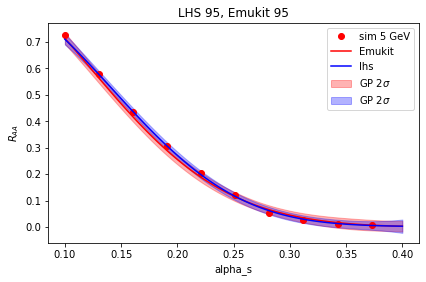

Working on design 5Working on design 4
Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


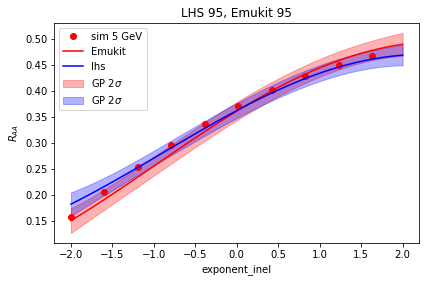

Working on design 4Working on design 3Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


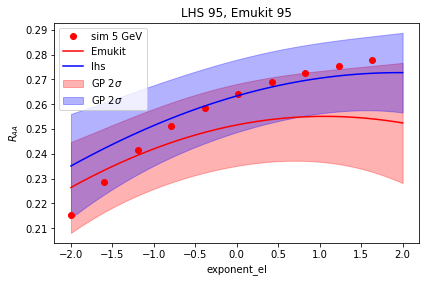

Working on design 4
Working on design 3
Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


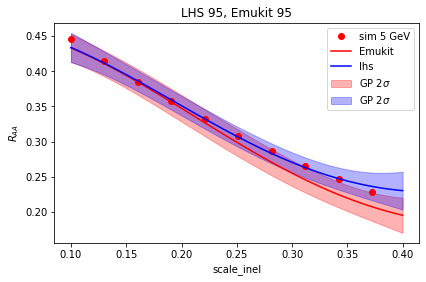

Working on design 3Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2Working on design 1


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.91 minutes


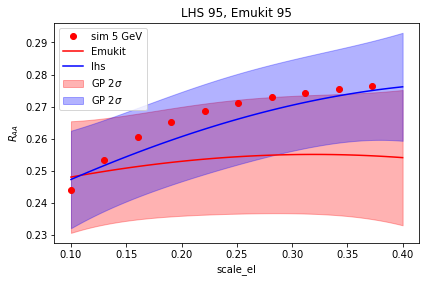

#################### 
 ######################
Validation score for 8 iteration AL 0.010002430371088096 , LHS 0.01050492644327509
######################
AL before hyperparameters are


Name : GP regression
Objective : -194.2945353274791
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.0988831324831727  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  4.401582246378249e-05  |      +ve      |        
Optimization restart 1/30, f = -194.29453532764762
Optimization restart 2/30, f = -194.29453532477515
Optimization restart 3/30, f = -194.29453530879977
Optimization restart 4/30, f = -194.2945353208762
Optimization restart 5/30, f = -194.29453531859428
Optimization restart 6/30, f = -194.2945352999178
Optimization restart 7/30, f = -194.29453532134386
Opt

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Total run time for the simulations 0.48 minutes
Optimization restart 1/30, f = -205.0135829164352
Optimization restart 2/30, f = -205.01358321701872
Optimization restart 3/30, f = -205.01358323740993
Optimization restart 4/30, f = -205.0135828384408
Optimization restart 5/30, f = -205.0135826787456
Optimization restart 6/30, f = -205.01358323059085
Optimization restart 7/30, f = -205.01358320189075
Optimization restart 8/30, f = -205.01358323638507
Optimization restart 9/30, f = -205.01358323431776
Optimization restart 10/30, f = -205.01358323627943
Optimization restart 11/30, f = -205.01358319360352
Optimization restart 12/30, f = -205.0135831885998
Optimization restart 13/30, f = -205.01358315872858
Optimization restart 14/30, f = -205.01358306993862
Optimization restart 15/30, f = -199.2612767109964
Optimization restart 16/30, f = -205.01358323745953
Optimization restart 17/30, f = -205.01358323744864
Optimization restart 18/30, f = -205.01358322448777
Optimization restart 19/30, f 

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 65.75527477264404 S
Total run time for the simulations 1.51 minutes


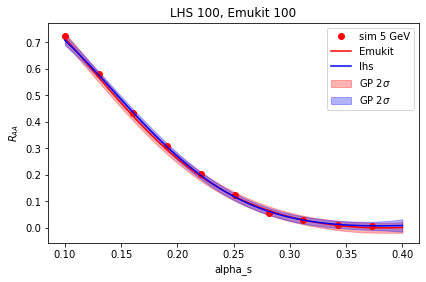

Working on design 2Working on design 3Working on design 1


Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


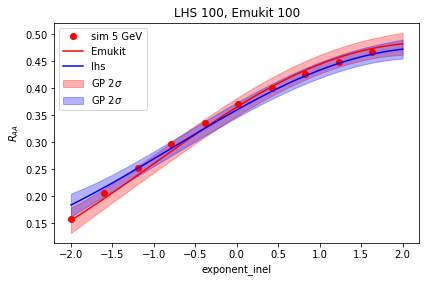

Working on design 4
Working on design 5Working on design 3



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.83 minutes


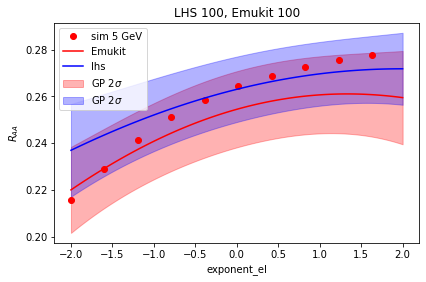

Working on design 4Working on design 5Working on design 3




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 1Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.84 minutes


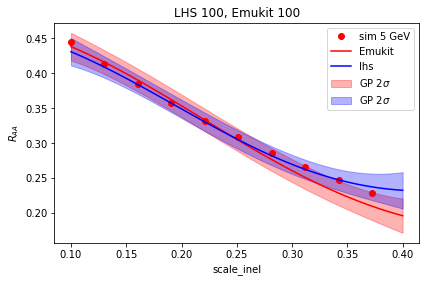

Working on design 3Working on design 5

Working on design 4


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 2
Working on design 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.91 minutes


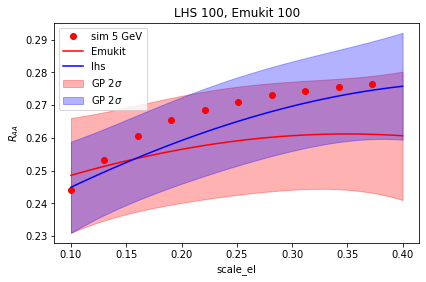

#################### 
 ######################
Validation score for 9 iteration AL 0.010175519565874452 , LHS 0.01107140662147926


In [17]:
import time
time_iter = []
bs = 5

# The active learning GP
GP_al = gp_array[0]
    
 # LHS GP
GP_lhs = gp_array[1]
validation_array = [compare_gp(GP_al, GP_lhs)]
for i in range(0,10):
    st = time.time()
    #val = compare_gp(GP_al, GP_lhs)
    #integrated_var = ModelVariance(model = GP_al)
    integrated_var = IntegratedVarianceReduction(model = GP_al, space=parameter_space)
    expdesign_loop = ExperimentalDesignLoop(model = GP_al,
                                         space = parameter_space,
                                         acquisition = integrated_var,
                                         batch_size = bs)
    print('######################')
    print('AL before hyperparameters are\n')
    print(GP_al.model)
    ed=expdesign_loop.run_loop(f,1)
    print('######################')
    print('AL After hyperparameters are \n')
    print(GP_al.model)    

    GP_lhs.set_data(X_all[:50+bs*(i+1),:], Y_all[:50+bs*(i+1),  pT_obs])
    print('######################')
    print('LHS before hyperparameters are\n')
    print(GP_lhs.model)
    GP_lhs.optimize()
    print('######################')
    print('LHS After hyperparameters are\n')
    print(GP_lhs.model)
    
    print(f'time taken for the iteraton {i} is {time.time()-st} S')
    time_iter.append(time.time()-st)
    val = compare_gp(GP_al, GP_lhs)
    validation_array.append(val)
    print('#################### \n ######################')
    print(f'Validation score for {i} iteration AL {val[0]} , LHS {val[1]}')

In [18]:
validation_array

[[0.015099546965741175, 0.015099552844838757],
 [0.023060398823430726, 0.014932625747186774],
 [0.02115327094338211, 0.013247679371191671],
 [0.022260950304346147, 0.012211520712029215],
 [0.021803385201655767, 0.011530018336085015],
 [0.021057855194992873, 0.011241583475815047],
 [0.021330339197522967, 0.011925167901296413],
 [0.014931524046813575, 0.012433464873415085],
 [0.011531871650786896, 0.01088188278817377],
 [0.010002430371088096, 0.01050492644327509],
 [0.010175519565874452, 0.01107140662147926]]

In [43]:
import pickle

In [44]:
with open('AL_int_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[0], f)  
        
with open('LHS_int_var_50_gp' , "wb") as f:
     pickle.dump(gp_array[1], f)          

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

In [ ]:
#validation_array = [[0.3497645851980539, 0.34976458473533767], [0.3555257417074416, 0.34673195130123846],
#                    [0.35296760623205115, 0.3497534016570972], [0.351482593548918, 0.35025848892902484],
#                    [0.35194158242772355, 0.34887572415246815], [0.3542566977764108, 0.3509867957806837],
#                    [0.3570148193271013, 0.3500230663671523]]

Text(0.5, 0, 'Number of training points')

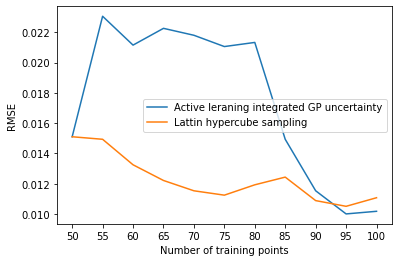

In [22]:
validation_array = np.array(validation_array)
fig, ax = plt.subplots()
n_train = np.arange(start_n,105,5)
ax.plot(n_train, validation_array[:,0], label = 'Active leraning integrated GP uncertainty')
ax.plot(n_train, validation_array[:,1], label = 'Lattin hypercube sampling')
ax.set_xticks(n_train)
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Number of training points')

In [24]:
time_iter

[1314.7403597831726,
 1490.0856726169586,
 1546.2490923404694,
 1602.1181147098541,
 1729.910038471222,
 1967.1426846981049,
 1952.2394316196442,
 2110.6161234378815,
 2173.69686794281,
 2301.6417598724365]

Text(0.5, 0, 'Number of training points')

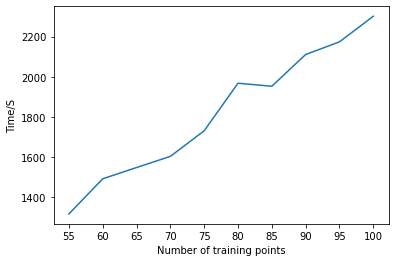

In [25]:
time_ar = np.array(time_iter)
fig, ax = plt.subplots()
n_train = np.arange(55,105,5)
ax.plot(n_train, time_ar, label = 'Active leraning time')
ax.set_xticks(n_train)
ax.set_ylabel('Time/S')
ax.set_xlabel('Number of training points')

In [26]:
AL_design = GP_al.X[start_n:,:]
print(AL_design.shape)

(50, 5)


In [37]:
c_l = np.array([i*np.ones(bs) for i in np.arange(0,AL_design.shape[0],bs)]).reshape(-1,1)

In [38]:
c_l.shape

(50, 1)

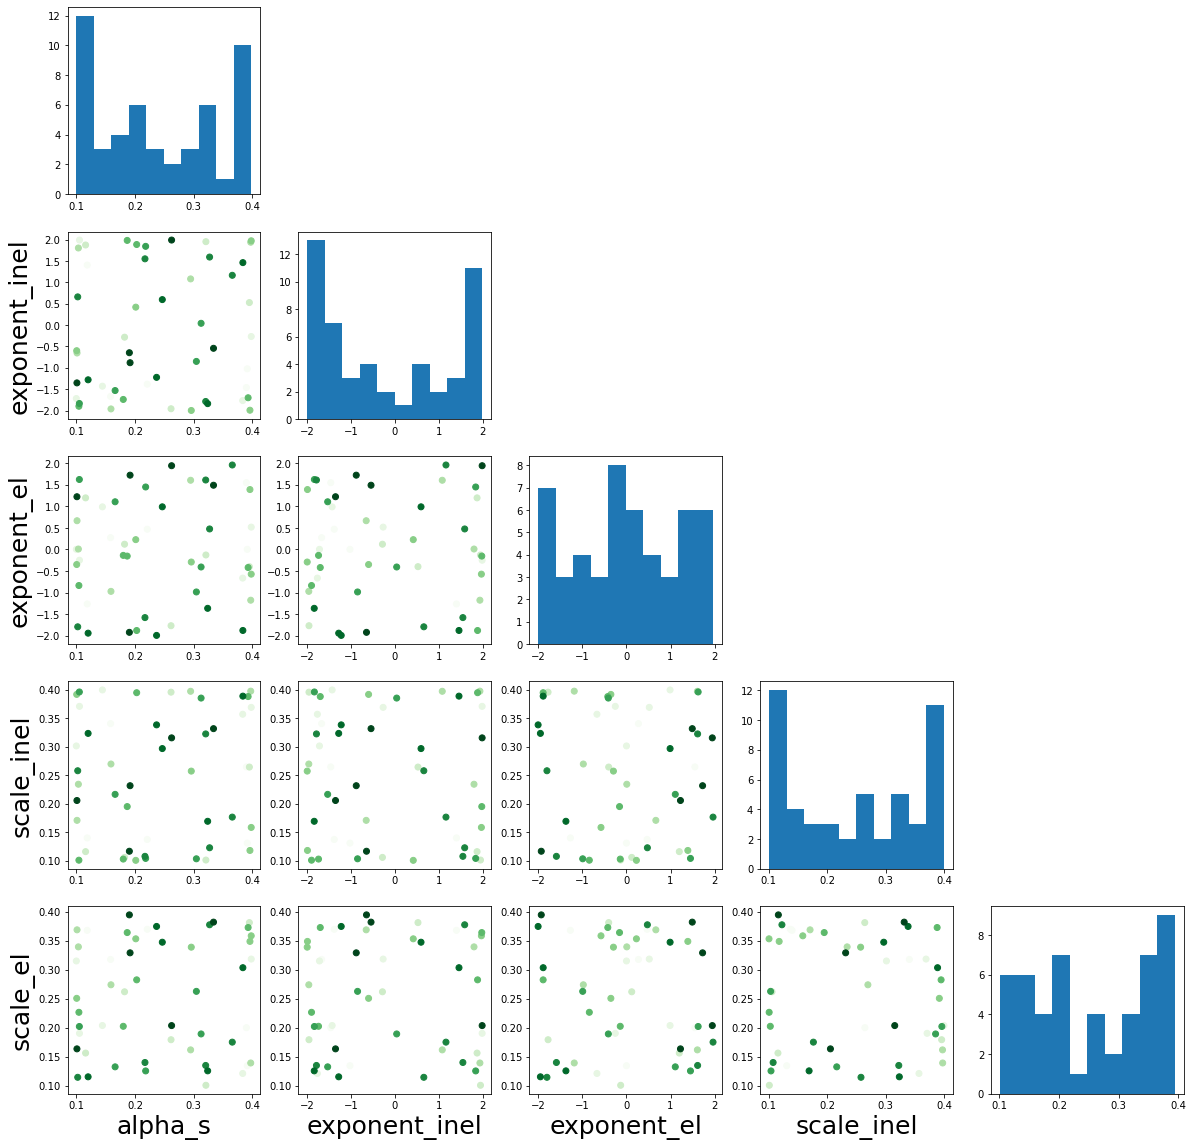

In [39]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(AL_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(AL_design[:,clmn],AL_design[:,row], c = c_l, cmap='Greens')

In [40]:
lhs_design = GP_lhs.X[start_n:,:]
print(lhs_design.shape)

(50, 5)


### How the lattin hyper cube sampling look like

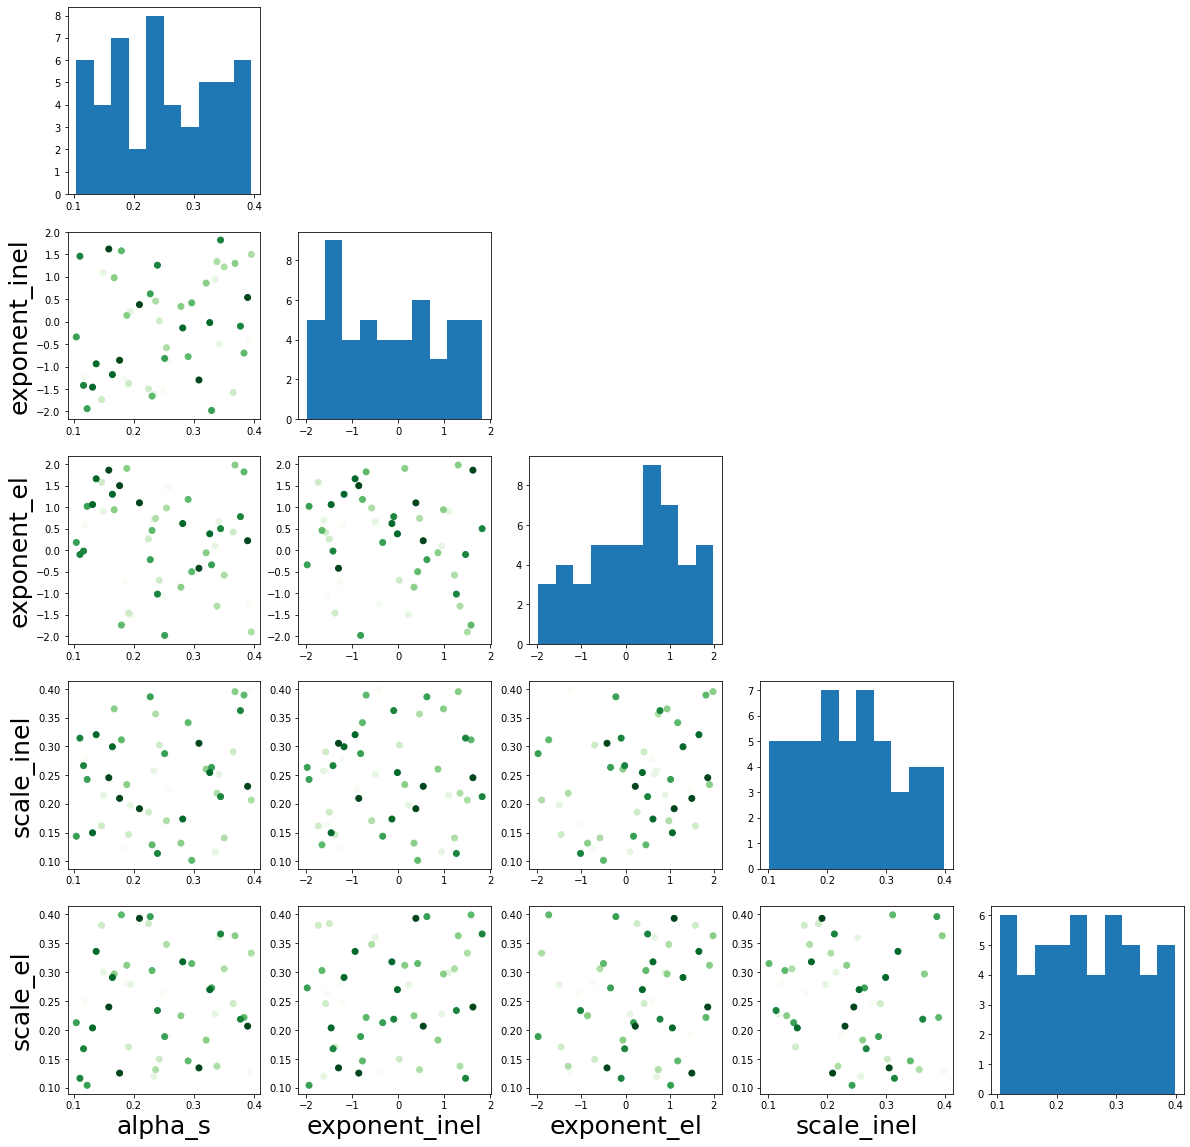

In [42]:


## Lattin Hyper cube samples
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(lhs_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(lhs_design[:,clmn],lhs_design[:,row], c = c_l, cmap='Greens')